In [1]:
import sys
import numpy as np
sys.path.insert(0,'..')
from survey import *


In [2]:
outcomes_generator = SurveyOutcomeGenerator('../configs/config_emily.yml', clean_folders=True)

/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
index1 = outcomes_generator.asset_index(cols=['con' + str(i) for i in range(10)] + \
                                        ['bin' + str(i) for i in range(10)], use_weights=False)
index2 = outcomes_generator.asset_index(cols=['con' + str(i) for i in range(10)] + \
                                        ['bin' + str(i) for i in range(10)], use_weights=True)
print('Correlation between weighted and unweighted asset indices: %.2f' % 
      np.corrcoef(index1['asset_index'].values, index2['asset_index'].values)[0][1])

PCA variance explained: 9.10%
PCA variance explained: 9.18%
Correlation between weighted and unweighted asset indices: 0.77


In [4]:
cols = ['con' + str(i) for i in range(10)] + ['bin' + str(i) for i in range(10)] + \
    ['cat' + str(i) for i in range(10)]
predictions = outcomes_generator.fit_pmt('consumption', cols, model_name='linear', winsorize=False, scale=False)

/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/em/.conda/envs/cider/lib/python3.7/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


R2 score: 0.21


In [5]:
predictions = outcomes_generator.pretrained_pmt('../synthetic_data/survey.csv', cols, 'linear')

/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
altered_data = pd.read_csv('../synthetic_data/survey.csv')
altered_data = altered_data.drop('bin0', axis=1)
try:
    predictions = outcomes_generator.pretrained_pmt(altered_data, cols, 'linear')
except ValueError:
    pass

/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
altered_data = pd.read_csv('../synthetic_data/survey.csv')
altered_data['cat1'] = altered_data['cat1'] + 1
altered_data['con1'] = altered_data['con1'] + 1
predictions = outcomes_generator.pretrained_pmt(altered_data, cols, 'linear')

In [8]:
features, correlations = outcomes_generator.select_features('consumption', cols, 8, method='correlation') 
print(features)

['bin3', 'con8', 'con9', 'bin2', 'cat8', 'bin7', 'con4', 'con2']


/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


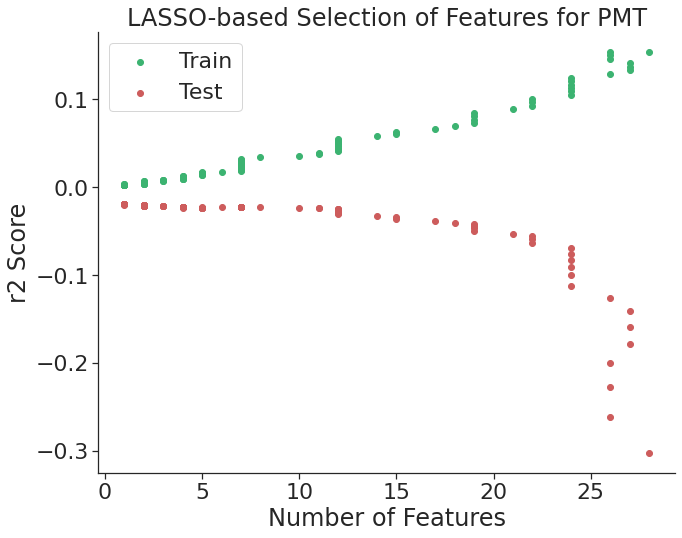

['con7', 'bin2', 'con9', 'con3', 'con4', 'cat9', 'cat4', 'cat7']


In [9]:
features, r2, alpha, scores = outcomes_generator.select_features('consumption', cols, 8, method='lasso')
print(features)

/home/em/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


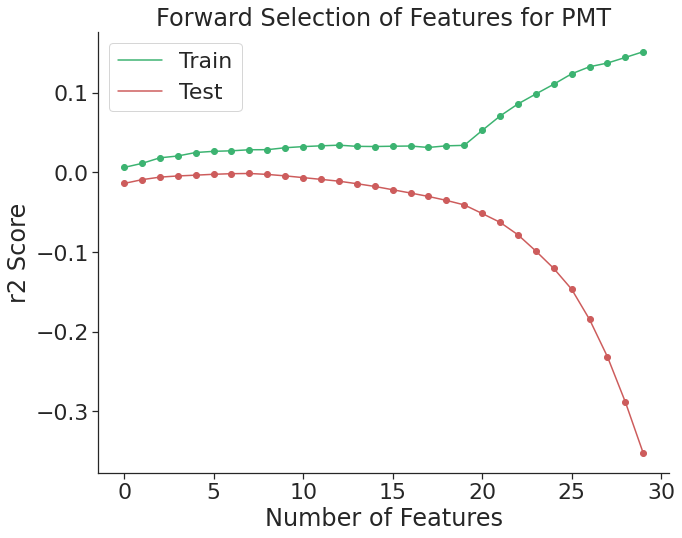

['bin2', 'bin1', 'bin3', 'con2', 'con8', 'bin9', 'bin4', 'con4']


In [10]:
features, scores = outcomes_generator.select_features('consumption', cols, 8, method=LinearRegression())
print(features)